In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [2]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df = pd.read_csv("data/고객db_전처리.csv")

In [24]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,48510000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280
287,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,39990000,현금,오프라인,3,0.047,0.116
288,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304
289,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,83040000,현금,온라인,2,0.006,0.268


In [4]:
df[['최근 구매 시점', '최근 구매 요일', '최근 거래 금액']]

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,2분기,평일,40920000
1,1분기,평일,86750000
2,1분기,평일,69540000
3,2분기,평일,48510000
4,4분기,주말,50330000
...,...,...,...
286,4분기,평일,88050000
287,3분기,평일,39990000
288,1분기,평일,71120000
289,1분기,평일,83040000


In [5]:
# groupby 하기
# 최근 구매 시점을 groupby 하고, 최근 구매 시점에 대한 최근 거래 금액 count 하기
df.groupby(['최근 구매 시점'])['최근 거래 금액'].count()

최근 구매 시점
1분기    80
2분기    60
3분기    75
4분기    76
Name: 최근 거래 금액, dtype: int64

In [6]:
# 최근 구매 요일 groupby 하고, 최근 구매 요일에 대한 최근 거래 금액 count 하기
df.groupby(['최근 구매 요일'])['최근 거래 금액'].count()

최근 구매 요일
주말     70
평일    221
Name: 최근 거래 금액, dtype: int64

In [7]:
# 따로따로 했을 시 정상적으로 출력되니까 합쳐서 출력하기
df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count()

최근 구매 시점  최근 구매 요일
1분기       주말          22
          평일          58
2분기       주말          15
          평일          45
3분기       주말          17
          평일          58
4분기       주말          16
          평일          60
Name: 최근 거래 금액, dtype: int64

In [8]:
# reset()_index() 활용하여 DataFrame 으로 변환하기
df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count().reset_index()

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [9]:
result = df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count().reset_index()

In [10]:
result

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [11]:
result.rename(columns={'최근 거래 금액' : '판매량'})

,최근 구매 시점,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [12]:
# 컬럼명을 '분기별', '요일별', '판매량' 으로 변경하기
result = result.rename(columns={'최근 거래 금액' : '판매량'})

In [13]:
result

,최근 구매 시점,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [14]:
result = result.rename(columns={'최근 구매 시점' : '분기별'})

In [15]:
result

,분기별,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [16]:
result = result.rename(columns={'최근 구매 요일' : '요일별'})

In [17]:
result

,분기별,요일별,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [18]:
# '분기별' 과 '요일별' 컬럼을 하나의 컬럼으로 합치는 작업 필요
# '구매정보' 컬럼으로 '분기별', '요일별' 컬럼 합치기
result['구매정보'] = result['분기별'] + ' - ' + result['요일별']

In [19]:
result

,분기별,요일별,판매량,구매정보
0,1분기,주말,22,1분기 - 주말
1,1분기,평일,58,1분기 - 평일
2,2분기,주말,15,2분기 - 주말
3,2분기,평일,45,2분기 - 평일
4,3분기,주말,17,3분기 - 주말
5,3분기,평일,58,3분기 - 평일
6,4분기,주말,16,4분기 - 주말
7,4분기,평일,60,4분기 - 평일


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

# 한글 폰트 설정 (운영체제에 맞는 폰트를 설정)
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
# matplotlib.rcParams['font.family'] = 'NanumGothic'  # Linux 사용자
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

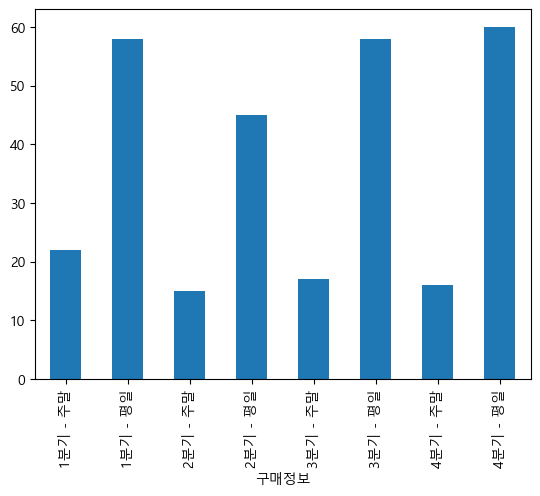

In [36]:
# 그래프로 시각화 하기
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.show()

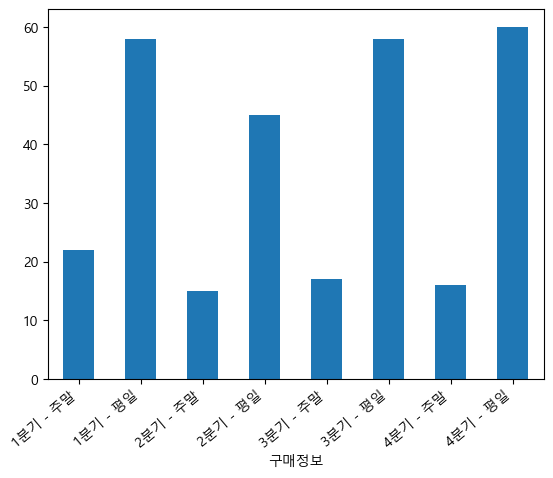

In [ ]:
# x축 레이블을 40도 회전
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.xticks(rotation=40, ha='right')
plt.show()

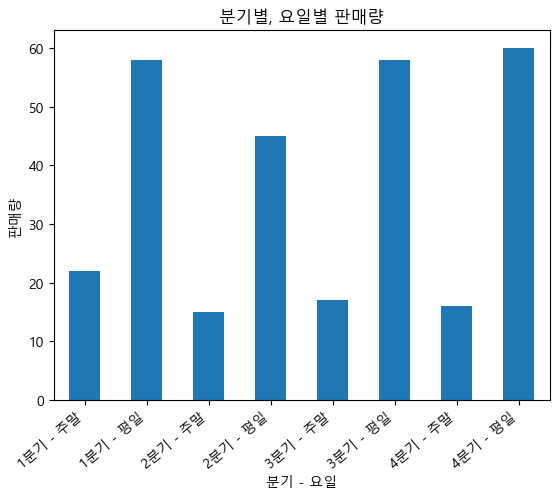

In [38]:
# 그래프 제목과 레이블 추가
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.xticks(rotation=40, ha='right')
plt.title('분기별, 요일별 판매량')
plt.xlabel('분기 - 요일')
plt.ylabel('판매량')
plt.show()